# Titanic Project

# Exploratory Data Analysis 

In [131]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [132]:
pd.set_option('display.max_rows',None)

In [133]:
df=pd.read_csv('titanic_project.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [134]:
!pip3 install seaborn

In [135]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [136]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Graphical Representation

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

Sex vs Survived 

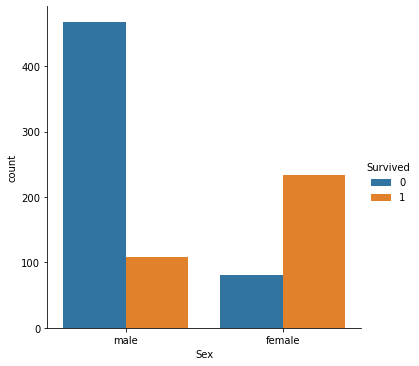

In [138]:
#CountPlot
sns.catplot(x='Sex',hue='Survived',kind='count',data=df)

Just by observing the graph, the survival rate of men is approx 20% and women is around 75%.so women play an vital role in determing the survival rate.

Pclass vs Survived

In [139]:
#Group the dataset by Pclass and Survived & unstack them
group=df.groupby(['Pclass','Survived'])
pclass_survived=group.size().unstack()

<AxesSubplot:xlabel='Survived', ylabel='Pclass'>

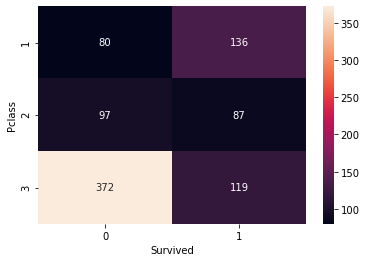

In [140]:
#Heatmap- Color encoded 2d representation of the data
sns.heatmap(pclass_survived, annot=True, fmt='d')

This graph help us to determine the survival rate of the passangers.Class 1 passnger have a higher survival chances when compared to classes 2 & 3.It implies that Pclass contribute is a lot to a passanger survival rate.

Age vs Survived

<AxesSubplot:xlabel='Sex', ylabel='Age'>

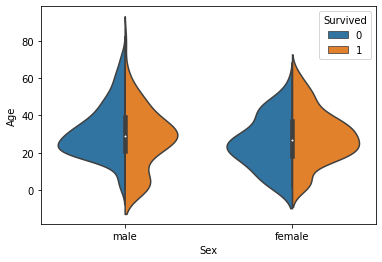

In [141]:
#Violinplot Display distribution of data across all level of category.
sns.violinplot(x='Sex',y='Age',hue='Survived',data=df, split=True)

The Survival rate of children, male & female is detemined in this graph.the women saved more at age of 20 to 50.the men is   saved less at ages increases.

Factor Plot for Family_Size(Count Features) and Family Size

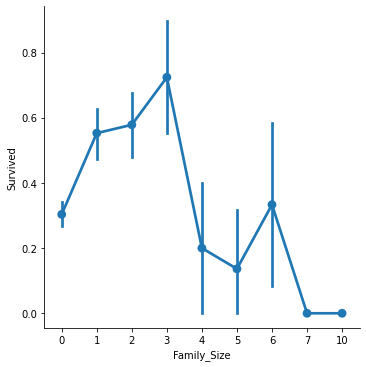

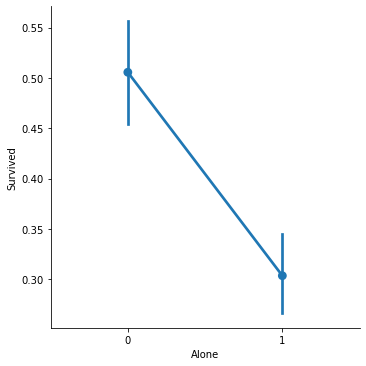

In [142]:
#Adding a column Family_Size
df['Family_Size']=0
df['Family_Size']=df['Parch']+df['SibSp']

#Adding a column Alone
df['Alone']=0
df.loc[df.Family_Size==0,'Alone']=1

#Factorplot for Family_size
sns.factorplot(x='Family_Size',y='Survived',data=df)

#Factorplot for Alone
sns.factorplot(x='Alone',y='Survived',data=df)

The Survival rate of Family Size and Alone is determined in this graph.The survival is less for passanger Alone & if family is more than 5 members, the chance of survival is more.

Bar plot for Fare


<AxesSubplot:xlabel='Fare_Range', ylabel='Survived'>

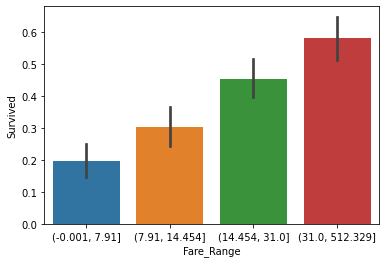

In [143]:
#Divide the faces into 4 bins
df['Fare_Range']=pd.qcut(df['Fare'],4)

#Barplot
sns.barplot(x='Fare_Range',y='Survived',data=df)


Fare denotes fare paid by a passanger.the graph which concluded that passenger paid a higher fare has more survival rate.

Counts Plot for Embarked

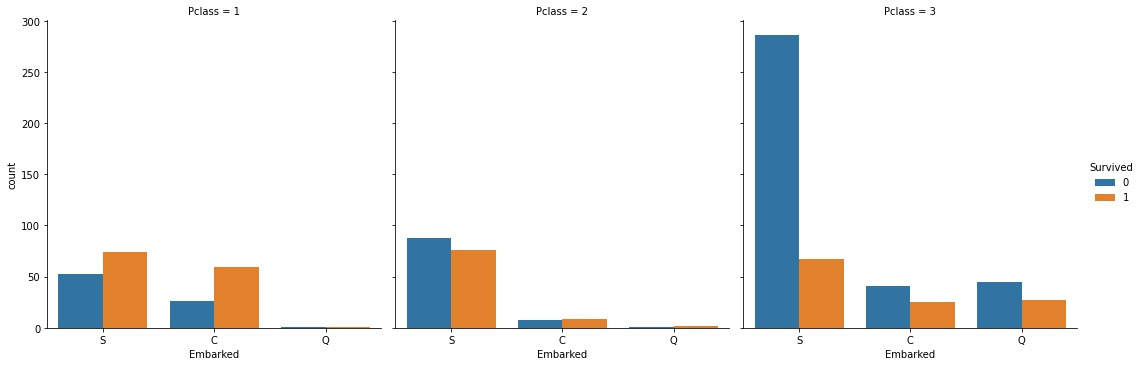

In [144]:
#Countplot
sns.catplot(x='Embarked',hue='Survived',kind='count',col='Pclass',data=df)

Conclusion of Graphical Representation

The columns that are going to be drop are PassengerId,Name,Ticket,Cabin.They are strings,cannot be categorized and dont contribute much to the outcome.

Age and Fare are retained.

In [145]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [146]:
df.drop(['Family_Size','Alone','Fare_Range'],axis=1,inplace=True)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [148]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [149]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [150]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [151]:
df['Age'].replace(''),np.nan

(0      22.00
 1      38.00
 2      26.00
 3      35.00
 4      35.00
 5        NaN
 6      54.00
 7       2.00
 8      27.00
 9      14.00
 10      4.00
 11     58.00
 12     20.00
 13     39.00
 14     14.00
 15     55.00
 16      2.00
 17       NaN
 18     31.00
 19       NaN
 20     35.00
 21     34.00
 22     15.00
 23     28.00
 24      8.00
 25     38.00
 26       NaN
 27     19.00
 28       NaN
 29       NaN
 30     40.00
 31       NaN
 32       NaN
 33     66.00
 34     28.00
 35     42.00
 36       NaN
 37     21.00
 38     18.00
 39     14.00
 40     40.00
 41     27.00
 42       NaN
 43      3.00
 44     19.00
 45       NaN
 46       NaN
 47       NaN
 48       NaN
 49     18.00
 50      7.00
 51     21.00
 52     49.00
 53     29.00
 54     65.00
 55       NaN
 56     21.00
 57     28.50
 58      5.00
 59     11.00
 60     22.00
 61     38.00
 62     45.00
 63      4.00
 64       NaN
 65       NaN
 66     29.00
 67     19.00
 68     17.00
 69     26.00
 70     32.00
 71   

In [152]:
df['Embarked'].replace(''),np.nan

(0        S
 1        C
 2        S
 3        S
 4        S
 5        Q
 6        S
 7        S
 8        S
 9        C
 10       S
 11       S
 12       S
 13       S
 14       S
 15       S
 16       Q
 17       S
 18       S
 19       C
 20       S
 21       S
 22       Q
 23       S
 24       S
 25       S
 26       C
 27       S
 28       Q
 29       S
 30       C
 31       C
 32       Q
 33       S
 34       C
 35       S
 36       C
 37       S
 38       S
 39       C
 40       S
 41       S
 42       C
 43       C
 44       Q
 45       S
 46       Q
 47       Q
 48       C
 49       S
 50       S
 51       S
 52       C
 53       S
 54       C
 55       S
 56       S
 57       C
 58       S
 59       S
 60       C
 61     NaN
 62       S
 63       S
 64       C
 65       C
 66       S
 67       S
 68       S
 69       S
 70       S
 71       S
 72       S
 73       C
 74       S
 75       S
 76       S
 77       S
 78       S
 79       S
 80       S
 81       S
 82       Q
 83 

In [153]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [154]:
df=df.fillna(np.mean(df['Age']))

In [155]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [163]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
df['Sex']=label_encoder.fit_transform(df['Sex'])
df['Sex'].unique()

array([1, 0], dtype=int64)

In [165]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()


In [166]:
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=l.fit_transform(df[i].values)

In [167]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,1
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,0
3,1,1,0,35.000000,1,0,53.1000,0
4,0,3,1,35.000000,0,0,8.0500,1
5,0,3,1,29.699118,0,0,8.4583,1
6,0,1,1,54.000000,0,0,51.8625,1
7,0,3,1,2.000000,3,1,21.0750,1
8,1,3,0,27.000000,0,2,11.1333,0
9,1,2,0,14.000000,1,0,30.0708,0


In [168]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,0.647587
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,1.000000


<AxesSubplot:>

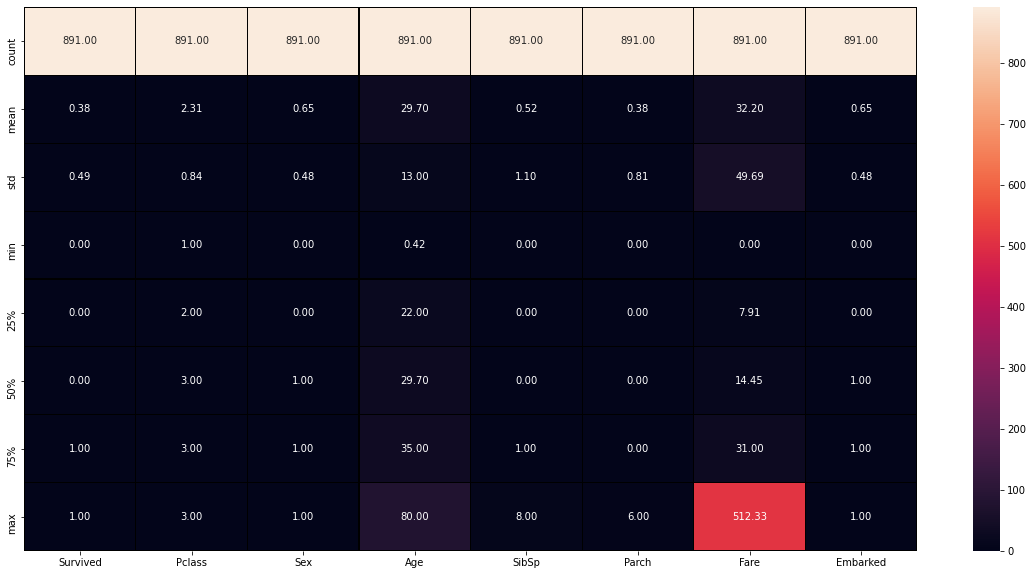

In [169]:
plt.figure(figsize=(20,10))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [170]:
dfcor=df.corr()
dfcor

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.131900
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,1.000000
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.084153
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.114631
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,-0.245489
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.182333
Embarked,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,1.000000


<AxesSubplot:>

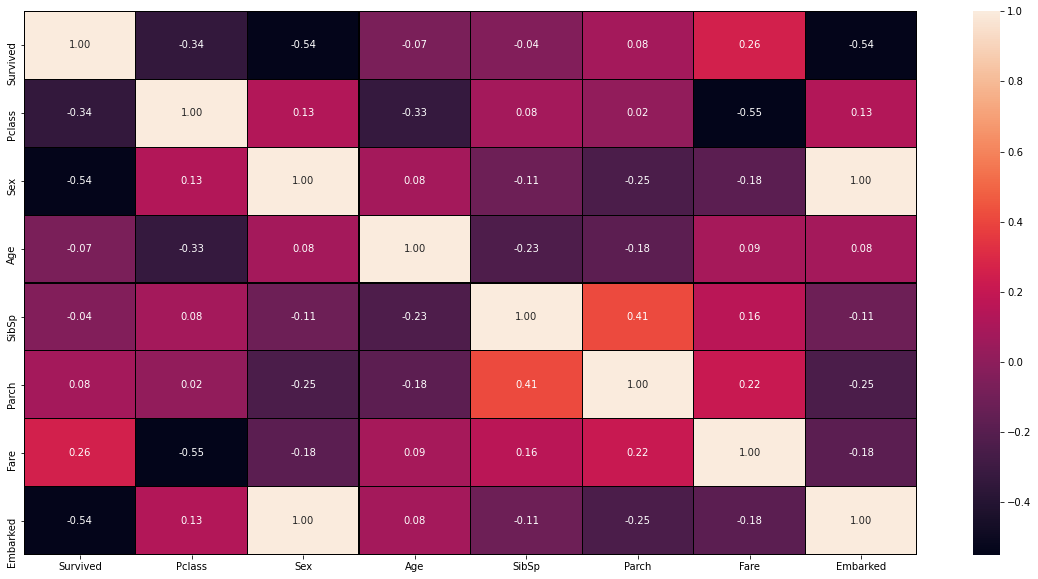

In [171]:
plt.figure(figsize=(20,10))
sns.heatmap(dfcor,annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [172]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -0.618921
dtype: float64

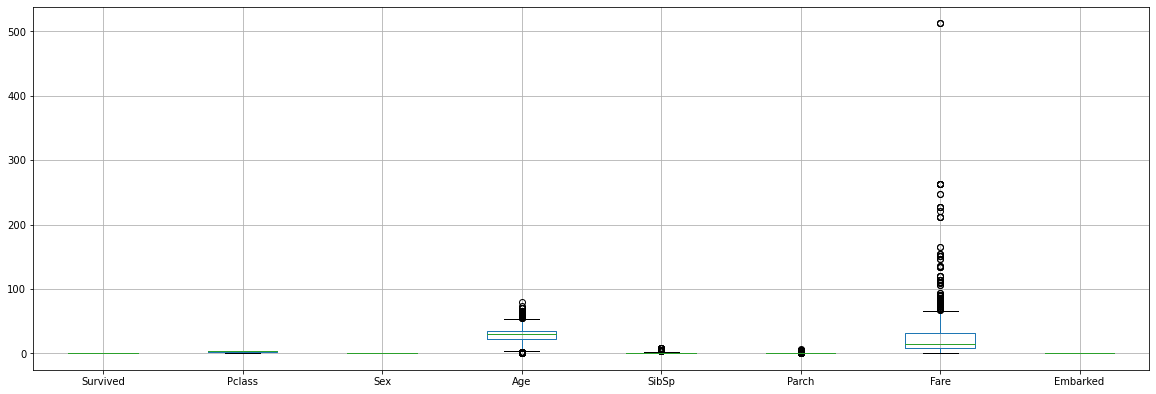

In [173]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [174]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.50244517,
        0.73769513],
       [1.2669898 , 1.56610693, 1.35557354, ..., 0.47367361, 0.78684529,
        1.35557354],
       [1.2669898 , 0.82737724, 1.35557354, ..., 0.47367361, 0.48885426,
        1.35557354],
       ...,
       [0.78927234, 0.82737724, 1.35557354, ..., 2.00893337, 0.17626324,
        1.35557354],
       [1.2669898 , 1.56610693, 0.73769513, ..., 0.47367361, 0.04438104,
        0.73769513],
       [0.78927234, 0.82737724, 0.73769513, ..., 0.47367361, 0.49237783,
        0.73769513]])

In [175]:
threshold=3
print(np.where(z>3))

(array([ 13,  16,  25,  27,  50,  59,  68,  71,  86,  88,  96, 116, 118,
       119, 159, 164, 167, 171, 180, 182, 201, 233, 258, 261, 266, 278,
       299, 311, 324, 341, 360, 377, 380, 386, 437, 438, 438, 480, 493,
       527, 541, 542, 557, 567, 610, 630, 638, 672, 678, 679, 683, 686,
       689, 700, 716, 730, 736, 737, 742, 745, 774, 779, 787, 792, 813,
       824, 846, 850, 851, 858, 863, 885], dtype=int64), array([5, 4, 5, 6, 4, 4, 4, 4, 5, 6, 3, 3, 6, 4, 4, 4, 5, 4, 4, 4, 4, 4,
       6, 4, 4, 4, 6, 6, 4, 6, 5, 6, 6, 4, 5, 5, 6, 4, 3, 6, 4, 4, 6, 5,
       5, 3, 5, 3, 5, 6, 4, 4, 6, 6, 6, 6, 5, 6, 6, 3, 5, 6, 4, 4, 4, 4,
       4, 4, 3, 5, 4, 5], dtype=int64))


In [176]:
df_new=df[(z<3).all(axis=1)]
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.000000,1,0,7.2500,1
1,1,1,0,38.000000,1,0,71.2833,0
2,1,3,0,26.000000,0,0,7.9250,0
3,1,1,0,35.000000,1,0,53.1000,0
4,0,3,1,35.000000,0,0,8.0500,1
5,0,3,1,29.699118,0,0,8.4583,1
6,0,1,1,54.000000,0,0,51.8625,1
7,0,3,1,2.000000,3,1,21.0750,1
8,1,3,0,27.000000,0,2,11.1333,0
9,1,2,0,14.000000,1,0,30.0708,0


In [177]:
df.shape

(891, 8)

In [178]:
df_new.shape

(820, 8)

In [179]:
Data_loss=((891-820)/891*100)
Data_loss

7.968574635241302

In [180]:
x= df.drop('Survived',axis=1)
y= df['Survived']

In [181]:
x.skew()

Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked   -0.618921
dtype: float64

In [182]:
from sklearn.preprocessing import power_transform
df_new=power_transform(x)

df_new=pd.DataFrame(df_new,columns=x.columns)

In [183]:
df_new.skew()

Pclass     -0.441438
Sex        -0.618921
Age         0.064420
SibSp       0.808608
Parch       1.228795
Fare       -0.040329
Embarked   -0.618921
dtype: float64

In [184]:
x=df_new
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.863973,0.737695,-0.556267,1.373636,-0.560253,-0.878820,0.737695
1,-1.459129,-1.355574,0.657269,1.373636,-0.560253,1.336651,-1.355574
2,0.863973,-1.355574,-0.241577,-0.679850,-0.560253,-0.790065,-1.355574
3,-1.459129,-1.355574,0.437923,1.373636,-0.560253,1.067352,-1.355574
4,0.863973,0.737695,0.437923,-0.679850,-0.560253,-0.774439,0.737695
5,0.863973,0.737695,0.042001,-0.679850,-0.560253,-0.725002,0.737695
6,-1.459129,0.737695,1.781551,-0.679850,-0.560253,1.045516,0.737695
7,0.863973,0.737695,-2.374696,1.718889,1.729206,0.184264,0.737695
8,0.863973,-1.355574,-0.164262,-0.679850,1.846856,-0.449944,-1.355574
9,-0.592604,-1.355574,-1.218469,1.373636,-0.560253,0.530176,-1.355574


In [188]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.7, random_state =i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    predrf = LR.predict(x_test)
    acc=accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is " ,maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8269230769230769  on Random_state  127


In [189]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .7, random_state =127)

In [191]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8269230769230769
[[356  36]
 [ 72 160]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87       392
           1       0.82      0.69      0.75       232

    accuracy                           0.83       624
   macro avg       0.82      0.80      0.81       624
weighted avg       0.83      0.83      0.82       624



In [192]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test,preddt))

0.7564102564102564
[[300  92]
 [ 60 172]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       392
           1       0.65      0.74      0.69       232

    accuracy                           0.76       624
   macro avg       0.74      0.75      0.75       624
weighted avg       0.77      0.76      0.76       624



In [194]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.7964743589743589
[[331  61]
 [ 66 166]]
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       392
           1       0.73      0.72      0.72       232

    accuracy                           0.80       624
   macro avg       0.78      0.78      0.78       624
weighted avg       0.80      0.80      0.80       624



In [195]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train,y_train)

ad_pred = svc.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8092948717948718
[[386   6]
 [113 119]]
              precision    recall  f1-score   support

           0       0.77      0.98      0.87       392
           1       0.95      0.51      0.67       232

    accuracy                           0.81       624
   macro avg       0.86      0.75      0.77       624
weighted avg       0.84      0.81      0.79       624



We are getting highest accuracy with LogisticRegression(83%). but it can be due to overhitting also so we well check cross validation scores.

In [199]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("cross validation score of LogisticRegression model:",scr.mean())

cross validation score of LogisticRegression model: 0.7889900194589166


In [200]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt, x, y, cv=5)
print("cross validation score of DecisionTree model:",scr.mean())

cross validation score of DecisionTree model: 0.7688657334756136


In [201]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(rf, x, y, cv=5)
print("cross validation score of RandomForest model:",scr.mean())

cross validation score of RandomForest model: 0.8114870378507314


In [202]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(svc, x, y, cv=5)
print("cross validation score of SVC model:",scr.mean())

cross validation score of SVC model: 0.8204193082669009


Min difference in accuracy and cross validation score is for Decision Tree Classifier model . so this is our best model.

# Hyper parameter Tuning

In [204]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': np.arange(2, 15),
             'criterion':['gini','entropy']}
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [205]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [206]:
mod=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=127)

mod.fit(x_train,y_train)
pred=mod.predict(x_test)
print(accuracy_score(y_test,pred)*100)

81.08974358974359


# Reciever Operating Characteristic(ROC)


In [207]:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score 

In [208]:
#Import some data to play with
iris = datasets.load_iris()
X=iris.data
Y=iris.target

#Binarize the output
Y=label_binarize(Y,classes=[0,1,2])
n_classes=Y.shape[1]

# Add noisy feautures to make the problem harder
random_state=np.random.RandomState(42)
n_samples,n_features=X.shape
X=np.c_[X,random_state.randn(n_samples,200*n_features)]

#shuffle and so=plit training and test sets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.7,random_state=127)

#learn to predict each class against the other
classifier=OneVsRestClassifier(svm.SVC(kernel='linear',probability=True,random_state=random_state))
Y_score=classifier.fit(X_train,Y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class 
fpr=dict()
tpr=dict()
roc_auc=dict()
for i in range(n_classes):
    fpr[i],tpr[i],_=roc_curve(Y_test[:,i],Y_score[:,i])
    roc_auc[i]=auc(fpr[i],tpr[i])
    
# Compute micro-average ROC curve and ROC area
fpr["micro"],tpr["micro"],_=roc_curve(Y_test.ravel(),Y_score.ravel())
roc_auc["micro"]=auc(fpr["micro"],tpr["micro"])

Plot of ROC curve for a specific class

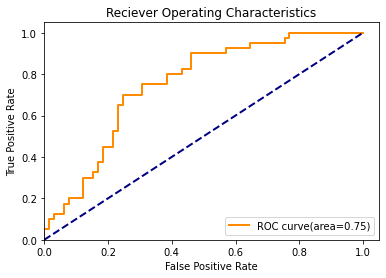

In [209]:
plt.figure()
lw=2
plt.plot(fpr[2],tpr[2],color='darkorange',
        lw=lw,label='ROC curve(area=%0.2f)'%roc_auc[2])
plt.plot([0,1],[0,1],color='navy',lw=lw,linestyle='--')
plt.xlim([0.0,1.05])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reciever Operating Characteristics')
plt.legend(loc="lower right")
plt.show()

In [211]:
Y_prob=classifier.predict_proba(X_test)
macro_roc_auc_ovo=roc_auc_score(Y_test,Y_prob,multi_class="ovo",average="macro")
weighted_roc_auc_ovo=roc_auc_score(Y_test,Y_prob,multi_class="ovo",average="weighted")
macro_roc_auc_ovr=roc_auc_score(Y_test,Y_prob,multi_class="ovr",average="macro")
weighted_roc_auc_ovr=roc_auc_score(Y_test,Y_prob,multi_class="ovo",average="weighted")

print("One-vs-One ROC AUC scores:\n{:.5f}(macro),\n{:.5f}"
     "(weighted by prevalance)"
     .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("One-vs-One ROC AUC scores:\n{:.5f}(macro),\n{:.5f}"
     "(weighted by prevalance)"
     .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.70824(macro),
0.70887(weighted by prevalance)
One-vs-One ROC AUC scores:
0.70824(macro),
0.70887(weighted by prevalance)


# Model Saving

In [213]:
import joblib
joblib.dump(mod,"PP5_Titanic_Project.pkl")

['PP5_Titanic_Project.pkl']

# Loading the saved model

In [214]:
model=joblib.load("PP5_Titanic_Project.pkl")

In [215]:
prediction=model.predict(x_test)

In [216]:
print(accuracy_score(y_test,prediction)*100)

81.08974358974359


In [217]:
prediction=pd.DataFrame(prediction)  # Converting into Data Frame

In [218]:
prediction.to_csv('Results.csv')  

In [219]:
prediction

,0
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,1
8,1
9,0
